# Importing Libraries #

In [2]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import calculations as cl
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

# Phase 1: #

Mappings

In [4]:
data = pd.read_csv("Airplane.csv",nrows=10000)

data["Customer Type"] = data["Customer Type"].map({"Loyal Customer": 0, "disloyal Customer": 1}).astype(int)
data["Type of Travel"] = data["Type of Travel"].map({"Personal Travel": 0, "Business travel": 1}).astype(int)
data["Class"] = data["Class"].map({"Eco Plus": 0, "Business": 1, "Eco": 2}).astype(int)
data['Gender'] = data['Gender'].map({"Male": 1, "Female": 0}).astype(int)

data.loc[data['Arrival Delay in Minutes'] <= 5, 'Arrival Delay in Minutes'] = 0
data.loc[(data['Arrival Delay in Minutes'] > 5) & (data['Arrival Delay in Minutes'] <= 15), 'Arrival Delay in Minutes'] = 1
data.loc[(data['Arrival Delay in Minutes'] > 15) & (data['Arrival Delay in Minutes'] <= 30), 'Arrival Delay in Minutes'] = 2
data.loc[data['Arrival Delay in Minutes'] > 30, 'Arrival Delay in Minutes'] = 3
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(0).astype(int)
 
data.loc[data['Age'] <= 15, 'Age'] = 0
data.loc[(data['Age'] > 15) & (data['Age'] <= 25), 'Age'] = 1
data.loc[(data['Age'] > 25) & (data['Age'] <= 40), 'Age'] = 2
data.loc[data['Age'] > 40, 'Age'] = 3

data.loc[data['Flight Distance'] <= 200, 'Flight Distance'] = 0
data.loc[(data['Flight Distance'] > 200) & (data['Flight Distance'] <= 500), 'Flight Distance'] = 1
data.loc[(data['Flight Distance'] > 500) & (data['Flight Distance'] <= 1000), 'Flight Distance'] = 2
data.loc[data['Flight Distance'] > 1000, 'Flight Distance'] = 3
 
data.loc[data['Departure Delay in Minutes'] <= 5, 'Departure Delay in Minutes'] = 0
data.loc[(data['Departure Delay in Minutes'] > 5) & (data['Age'] <= 15), 'Departure Delay in Minutes'] = 1
data.loc[(data['Departure Delay in Minutes'] > 15) & (data['Age'] <= 30), 'Departure Delay in Minutes'] = 2
data.loc[data['Departure Delay in Minutes'] > 30, 'Departure Delay in Minutes'] = 3 

data["satisfaction"] = data["satisfaction"].map({"neutral or dissatisfied": 0, "satisfied": 1}).astype(int)

In [7]:
_data = data.drop(["id", "Unnamed: 0","satisfaction"], axis=1).values
target = data["satisfaction"].values

train_data, test_data, train_target, test_target = train_test_split(
    _data, target, test_size=0.2, random_state=1234
)

clf = MLPClassifier(max_iter=400)
clf.fit(train_data, train_target)
predictions = clf.predict(test_data)
cl.accuracy(test_target, predictions)

0.9405

# Phase 2: #

ANN Model

In [2]:
mlp = tf.keras.models.Sequential()
mlp.add(tf.keras.layers.Dense(62, activation='relu', input_dim=1))
mlp.add(tf.keras.layers.Dense(62, activation='relu'))
mlp.add(tf.keras.layers.Dense(62, activation='relu'))
mlp.add(tf.keras.layers.Dense(1, activation='linear'))
mlp.compile(loss='mse', optimizer='adam', metrics=['mae'])

train_size = 8000
test_size = 2000

x_train = np.linspace(-10, 10, train_size)
x_test =  np.linspace(-10, 10, test_size)


Sine Function

Epoch 1/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4507 - mae: 0.5852
Epoch 2/200
250/250 [==============================] - 0s 952us/step - loss: 0.3448 - mae: 0.4778
Epoch 3/200
250/250 [==============================] - 0s 960us/step - loss: 0.2536 - mae: 0.3885
Epoch 4/200
250/250 [==============================] - 0s 944us/step - loss: 0.2031 - mae: 0.3329
Epoch 5/200
250/250 [==============================] - 0s 960us/step - loss: 0.1854 - mae: 0.3029
Epoch 6/200
250/250 [==============================] - 0s 940us/step - loss: 0.1806 - mae: 0.2966
Epoch 7/200
250/250 [==============================] - 0s 920us/step - loss: 0.1780 - mae: 0.2922
Epoch 8/200
250/250 [==============================] - 0s 859us/step - loss: 0.1604 - mae: 0.2729
Epoch 9/200
250/250 [==============================] - 0s 855us/step - loss: 0.1513 - mae: 0.2633
Epoch 10/200
250/250 [==============================] - 0s 960us/step - loss: 0.1360 - mae: 0.2451
Epoch 11/200
250/250 

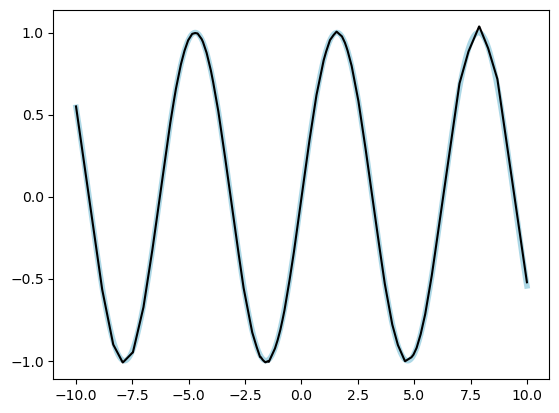

In [39]:
y_train = cl.sin(x_train)
y_test =  cl.sin(x_test)

mlp.fit(x_train, y_train, epochs=200)
pred = mlp.predict(x_test)

plt.plot(x_train, y_train, color='lightblue', linewidth='4')
plt.plot(x_test, pred, color='black')

print(f"Sine Error: {mean_squared_error(pred, y_test)}")
plt.show()


Sink Function

Epoch 1/200
250/250 [==============================] - 0s 1ms/step - loss: 0.0246 - mae: 0.0825
Epoch 2/200
250/250 [==============================] - 0s 927us/step - loss: 0.0014 - mae: 0.0282
Epoch 3/200
250/250 [==============================] - 0s 874us/step - loss: 8.8974e-04 - mae: 0.0224
Epoch 4/200
250/250 [==============================] - 0s 1ms/step - loss: 7.0237e-04 - mae: 0.0198
Epoch 5/200
250/250 [==============================] - 0s 1ms/step - loss: 5.8293e-04 - mae: 0.0179
Epoch 6/200
250/250 [==============================] - 0s 1ms/step - loss: 4.9550e-04 - mae: 0.0167
Epoch 7/200
250/250 [==============================] - 0s 1ms/step - loss: 4.0720e-04 - mae: 0.0151
Epoch 8/200
250/250 [==============================] - 0s 1ms/step - loss: 4.0887e-04 - mae: 0.0149
Epoch 9/200
250/250 [==============================] - 0s 1ms/step - loss: 3.8200e-04 - mae: 0.0142
Epoch 10/200
250/250 [==============================] - 0s 1ms/step - loss: 3.0053e-04 - mae: 0.0127
Epo

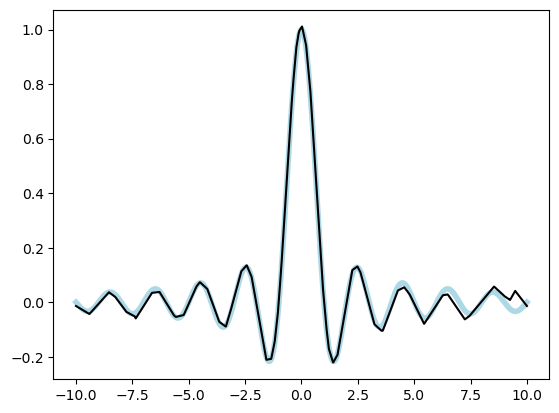

In [40]:
y_train = cl.sink(x_train)
y_test =  cl.sink(x_test)

mlp.fit(x_train, y_train, epochs=200)
pred = mlp.predict(x_test)

plt.plot(x_train, y_train, color='lightblue', linewidth='4')
plt.plot(x_test, pred, color='black')

print(f"Sink Error: {mean_squared_error(pred, y_test)}")


Tan Function

Epoch 1/200
250/250 [==============================] - 0s 1ms/step - loss: 2316.9575 - mae: 5.1791
Epoch 2/200
250/250 [==============================] - 0s 1ms/step - loss: 2316.3308 - mae: 5.1335
Epoch 3/200
250/250 [==============================] - 0s 1ms/step - loss: 2316.1116 - mae: 5.1449
Epoch 4/200
250/250 [==============================] - 0s 1ms/step - loss: 2315.9150 - mae: 5.1269
Epoch 5/200
250/250 [==============================] - 0s 1ms/step - loss: 2315.8286 - mae: 5.1116
Epoch 6/200
250/250 [==============================] - 0s 1ms/step - loss: 2315.8010 - mae: 5.1313
Epoch 7/200
250/250 [==============================] - 0s 1ms/step - loss: 2315.7068 - mae: 5.1288
Epoch 8/200
250/250 [==============================] - 0s 991us/step - loss: 2315.7119 - mae: 5.1236
Epoch 9/200
250/250 [==============================] - 0s 1ms/step - loss: 2315.6162 - mae: 5.1228
Epoch 10/200
250/250 [==============================] - 0s 1ms/step - loss: 2315.5491 - mae: 5.1276
Epoch 1

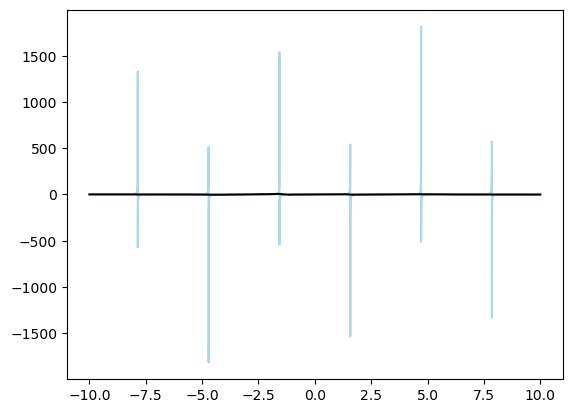

In [41]:
y_train = cl.tan(x_train)
y_test =  cl.tan(x_test)

mlp.fit(x_train, y_train, epochs=200)
pred = mlp.predict(x_test)

plt.plot(x_train, y_train, color='lightblue')
plt.plot(x_test, pred, color='black')

print(f"Tan Error: {mean_squared_error(pred, y_test)}")


Stairs Function

Epoch 1/200
250/250 [==============================] - 0s 924us/step - loss: 18.7074 - mae: 3.2252
Epoch 2/200
250/250 [==============================] - 0s 968us/step - loss: 3.8767 - mae: 1.5176
Epoch 3/200
250/250 [==============================] - 0s 859us/step - loss: 1.6897 - mae: 1.0763
Epoch 4/200
250/250 [==============================] - 0s 984us/step - loss: 1.1385 - mae: 0.8888
Epoch 5/200
250/250 [==============================] - 0s 892us/step - loss: 0.7732 - mae: 0.7288
Epoch 6/200
250/250 [==============================] - 0s 940us/step - loss: 0.4448 - mae: 0.5403
Epoch 7/200
250/250 [==============================] - 0s 888us/step - loss: 0.2222 - mae: 0.3736
Epoch 8/200
250/250 [==============================] - 0s 884us/step - loss: 0.1372 - mae: 0.2947
Epoch 9/200
250/250 [==============================] - 0s 876us/step - loss: 0.1095 - mae: 0.2664
Epoch 10/200
250/250 [==============================] - 0s 867us/step - loss: 0.0937 - mae: 0.2504
Epoch 11/200
250/2

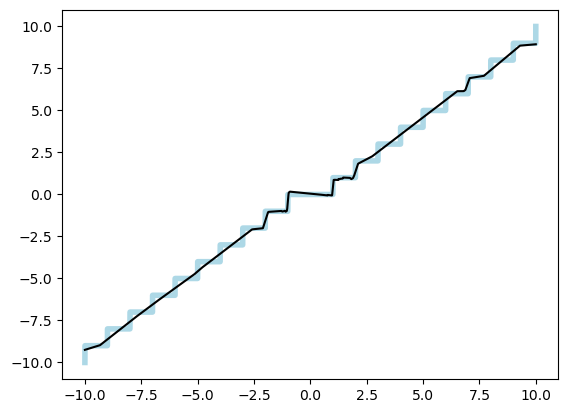

In [42]:
y_train = cl.stairs(x_train)
y_test =  cl.stairs(x_test)

mlp.fit(x_train, y_train, epochs=200)
pred = mlp.predict(x_test)

plt.plot(x_train, y_train, color='lightblue', linewidth='4')
plt.plot(x_test, pred, color='black')

print(f"Stairs Error: {mean_squared_error(pred, y_test)}")


# Phase 3: #

Noise

In [14]:
train_noise = np.random.normal(0, 1, train_size)
test_noise = np.random.normal(0, 1, test_size)

Sine Function

Epoch 1/200
250/250 [==============================] - 0s 919us/step - loss: 1.8111 - mae: 0.9661
Epoch 2/200
250/250 [==============================] - 0s 862us/step - loss: 1.0617 - mae: 0.8194
Epoch 3/200
250/250 [==============================] - 0s 1ms/step - loss: 1.0494 - mae: 0.8168
Epoch 4/200
250/250 [==============================] - 0s 1ms/step - loss: 1.0466 - mae: 0.8155
Epoch 5/200
250/250 [==============================] - 0s 1ms/step - loss: 1.0453 - mae: 0.8160
Epoch 6/200
250/250 [==============================] - 0s 1ms/step - loss: 1.0437 - mae: 0.8149
Epoch 7/200
250/250 [==============================] - 0s 997us/step - loss: 1.0504 - mae: 0.8158
Epoch 8/200
250/250 [==============================] - 0s 873us/step - loss: 1.0434 - mae: 0.8155
Epoch 9/200
250/250 [==============================] - 0s 913us/step - loss: 1.0434 - mae: 0.8136
Epoch 10/200
250/250 [==============================] - 0s 869us/step - loss: 1.0525 - mae: 0.8169
Epoch 11/200
250/250 [=====

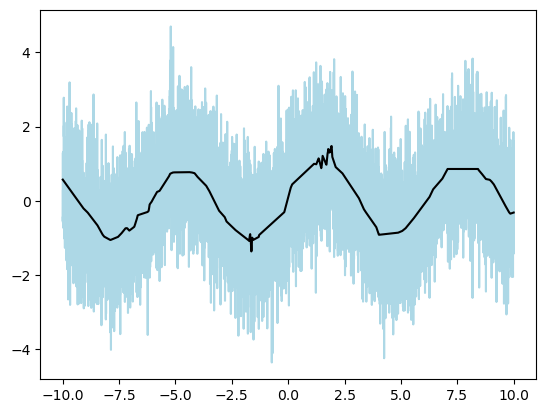

In [15]:
y_train = cl.sin(x_train) + train_noise
y_test =  cl.sin(x_test) + test_noise

mlp.fit(x_train, y_train, epochs=200)
pred = mlp.predict(x_test)

plt.plot(x_train, y_train, color='lightblue')
plt.plot(x_test, pred, color='black')

print(f"Sine Error: {mean_squared_error(pred, y_test)}")
plt.show()


Sink Function

Epoch 1/200
  1/250 [..............................] - ETA: 0s - loss: 1.3845 - mae: 0.9906

250/250 [==============================] - 0s 915us/step - loss: 1.1490 - mae: 0.8592
Epoch 2/200
250/250 [==============================] - 0s 857us/step - loss: 1.0529 - mae: 0.8181
Epoch 3/200
250/250 [==============================] - 0s 1ms/step - loss: 1.0397 - mae: 0.8115
Epoch 4/200
250/250 [==============================] - 0s 1ms/step - loss: 1.0366 - mae: 0.8111
Epoch 5/200
250/250 [==============================] - 0s 1ms/step - loss: 1.0344 - mae: 0.8095
Epoch 6/200
250/250 [==============================] - 0s 869us/step - loss: 1.0324 - mae: 0.8100
Epoch 7/200
250/250 [==============================] - 0s 865us/step - loss: 1.0334 - mae: 0.8100
Epoch 8/200
250/250 [==============================] - 0s 869us/step - loss: 1.0281 - mae: 0.8073
Epoch 9/200
250/250 [==============================] - 0s 857us/step - loss: 1.0299 - mae: 0.8091
Epoch 10/200
250/250 [==============================] - 0s 881us/step - loss: 1.0290 - mae: 0.8078
Epoch 11/200
250/250 [===============

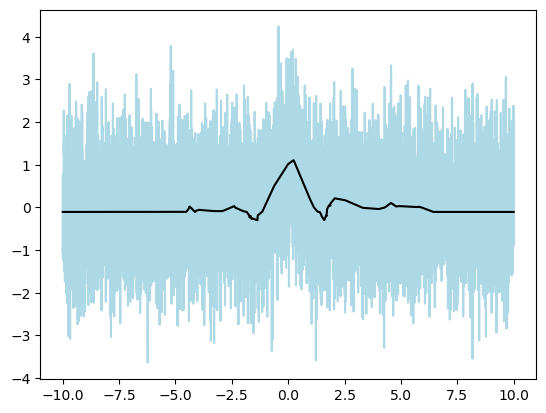

In [16]:
y_train = cl.sink(x_train) + train_noise
y_test =  cl.sink(x_test) + test_noise

mlp.fit(x_train, y_train, epochs=200)
pred = mlp.predict(x_test)

plt.plot(x_train, y_train, color='lightblue')
plt.plot(x_test, pred, color='black')

print(f"Sink Error: {mean_squared_error(pred, y_test)}")


Tan Function

Epoch 1/200


250/250 [==============================] - 0s 950us/step - loss: 2317.0171 - mae: 5.4183
Epoch 2/200
250/250 [==============================] - 0s 919us/step - loss: 2317.1956 - mae: 5.3859
Epoch 3/200
250/250 [==============================] - 0s 841us/step - loss: 2316.8467 - mae: 5.3586
Epoch 4/200
250/250 [==============================] - 0s 865us/step - loss: 2317.2683 - mae: 5.3437
Epoch 5/200
250/250 [==============================] - 0s 841us/step - loss: 2315.8345 - mae: 5.3393
Epoch 6/200
250/250 [==============================] - 0s 841us/step - loss: 2316.0603 - mae: 5.3100
Epoch 7/200
250/250 [==============================] - 0s 896us/step - loss: 2316.7266 - mae: 5.3107
Epoch 8/200
250/250 [==============================] - 0s 847us/step - loss: 2315.9897 - mae: 5.2903
Epoch 9/200
250/250 [==============================] - 0s 973us/step - loss: 2315.9050 - mae: 5.2937
Epoch 10/200
250/250 [==============================] - 0s 889us/step - loss: 2315.6860 - mae: 5.3056
E

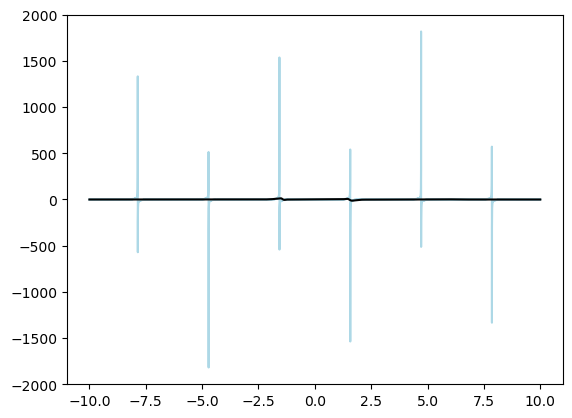

In [17]:
y_train = cl.tan(x_train) + train_noise
y_test =  cl.tan(x_test) + test_noise

mlp.fit(x_train, y_train, epochs=200)
pred = mlp.predict(x_test)

plt.plot(x_train, y_train, color='lightblue')
plt.plot(x_test, pred, color='black')

print(f"Tan Error: {mean_squared_error(pred, y_test)}")


Stairs Function

Epoch 1/200
  1/250 [..............................] - ETA: 1s - loss: 33.9505 - mae: 4.8961

250/250 [==============================] - 0s 991us/step - loss: 24.5269 - mae: 3.9864
Epoch 2/200
250/250 [==============================] - 0s 831us/step - loss: 12.8229 - mae: 2.6802
Epoch 3/200
250/250 [==============================] - 0s 856us/step - loss: 8.8268 - mae: 2.1588
Epoch 4/200
250/250 [==============================] - 0s 2ms/step - loss: 6.3486 - mae: 1.8225
Epoch 5/200
250/250 [==============================] - 0s 1ms/step - loss: 4.9292 - mae: 1.6341
Epoch 6/200
250/250 [==============================] - 0s 1ms/step - loss: 4.1755 - mae: 1.5295
Epoch 7/200
250/250 [==============================] - 0s 1ms/step - loss: 3.7765 - mae: 1.4693
Epoch 8/200
250/250 [==============================] - 0s 1ms/step - loss: 3.1085 - mae: 1.3240
Epoch 9/200
250/250 [==============================] - 0s 983us/step - loss: 2.0767 - mae: 1.0884
Epoch 10/200
250/250 [==============================] - 0s 973us/step - loss: 1.6471 - mae: 0.9943
Epoch 11/200
250/250 [=================

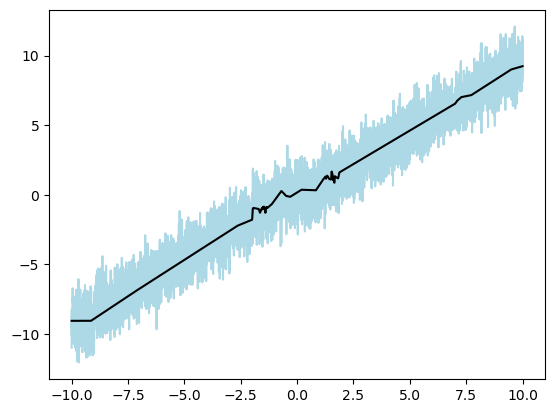

In [18]:
y_train = cl.stairs(x_train) + train_noise
y_test =  cl.stairs(x_test) + test_noise

mlp.fit(x_train, y_train, epochs=200)
pred = mlp.predict(x_test)

plt.plot(x_train, y_train, color='lightblue')
plt.plot(x_test, pred, color='black')

print(f"Stairs Error: {mean_squared_error(pred, y_test)}")


# Phase 4: #

Epoch 1/300
50/50 [==============================] - 1s 895us/step - loss: 7.7167
Epoch 2/300
50/50 [==============================] - 0s 895us/step - loss: 5.4973
Epoch 3/300
50/50 [==============================] - 0s 895us/step - loss: 4.9406
Epoch 4/300
50/50 [==============================] - 0s 915us/step - loss: 4.0144
Epoch 5/300
50/50 [==============================] - 0s 915us/step - loss: 3.5701
Epoch 6/300
50/50 [==============================] - 0s 915us/step - loss: 3.2169
Epoch 7/300
50/50 [==============================] - 0s 915us/step - loss: 2.9926
Epoch 8/300
50/50 [==============================] - 0s 915us/step - loss: 2.5898
Epoch 9/300
50/50 [==============================] - 0s 976us/step - loss: 2.2882
Epoch 10/300
50/50 [==============================] - 0s 915us/step - loss: 2.1377
Epoch 11/300
50/50 [==============================] - 0s 936us/step - loss: 1.9108
Epoch 12/300
50/50 [==============================] - 0s 936us/step - loss: 1.6601
Epoch 13/300


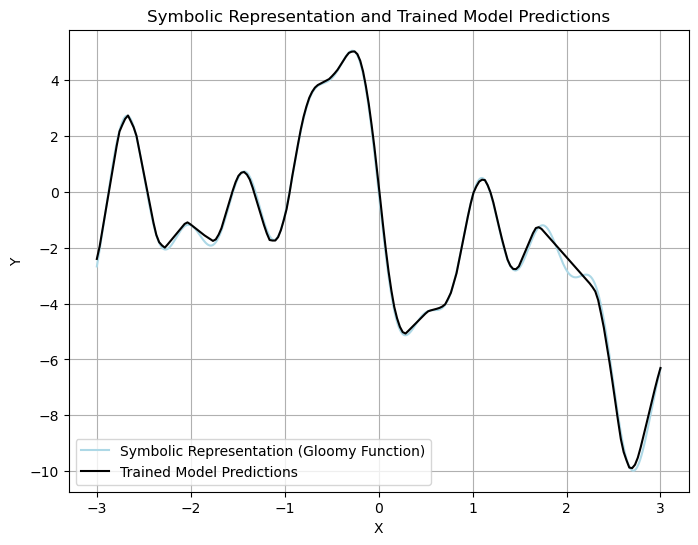

In [9]:
num_points = 100
x_values = np.linspace(-3, 3, 800)
y_values = cl.gloomy_function(x_values)

mlp = tf.keras.models.Sequential()
mlp.add(tf.keras.layers.Dense(100, activation='relu', input_dim=1))
mlp.add(tf.keras.layers.Dense(100, activation='relu'))
mlp.add(tf.keras.layers.Dense(100, activation='relu'))
mlp.add(tf.keras.layers.Dense(1, activation='linear'))
mlp.compile(loss='mse', optimizer='adam', metrics=['mae'])

mlp.compile(optimizer='adam', loss='mse')
x_values_reshaped = x_values.reshape(-1, 1)
mlp.fit(x_values_reshaped, y_values, epochs=300, batch_size=16, verbose=1)

x_test = np.linspace(-3, 3, 200)
x_test_reshaped = x_test.reshape(-1, 1)
y_pred = mlp.predict(x_test_reshaped)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, color='lightblue', label='Symbolic Representation (Gloomy Function)')
plt.plot(x_test, y_pred, color='black', label='Trained Model Predictions')
plt.title('Symbolic Representation and Trained Model Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Phase 5: #

In [26]:
(x_data, y_data), (_, _) = cifar10.load_data()

print(f"Number of samples: {x_data.shape[0]}")
print(f"Image shape: {x_data.shape[1:]}")
print(f"Number of unique labels: {len(set(y_data.flatten()))}")

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

x_train = x_train / 255.0
x_test = x_test / 255.0

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Perform k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for train_idx, val_idx in kfold.split(x_train, y_train_encoded):
    X_train_fold, X_val_fold = x_train[train_idx], x_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
    
    model.fit(X_train_fold, y_train_fold, epochs=10, validation_data=(X_val_fold, y_val_fold), verbose=0)
    
    _, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores.append(accuracy)

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Final model trained on the entire training set
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
_, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
print("Final accuracy: ", accuracy)

Number of samples: 50000
Image shape: (32, 32, 3)
Number of unique labels: 10


c:\Users\DarknesS\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DarknesS\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Cross-Validation Scores: [0.6729999780654907, 0.7114999890327454, 0.7862499952316284, 0.8346250057220459, 0.8637499809265137]
Mean Accuracy: 0.7738249897956848
Epoch 1/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.1997 - accuracy: 0.9342 - val_loss: 2.3504 - val_accuracy: 0.6590
Epoch 2/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.1480 - accuracy: 0.9498 - val_loss: 2.4428 - val_accuracy: 0.6611
Epoch 3/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.1264 - accuracy: 0.9562 - val_loss: 2.6014 - val_accuracy: 0.6546
Epoch 4/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.1271 - accuracy: 0.9555 - val_loss: 2.6698 - val_accuracy: 0.6650
Epoch 5/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.1243 - accuracy: 0.9560 - val_loss: 2.6288 - val_accuracy: 0.6660
Epoch 6/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.1243 - accuracy: 0.9566 - val_loss: 2.7861

plot

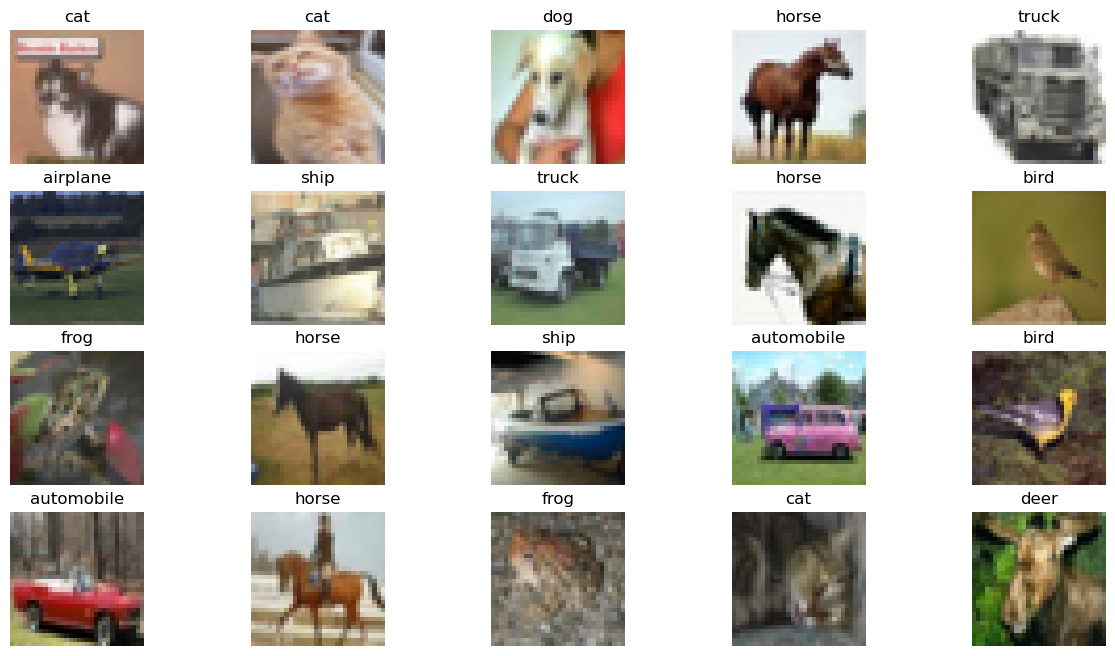

In [27]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Select a few random indices from the test set
random_indices = np.random.choice(len(x_test), size=20, replace=False)

# Plot the images
plt.figure(figsize=(15, 8))
for i, idx in enumerate(random_indices, 1):
    plt.subplot(4, 5, i)
    plt.imshow(x_test[idx])
    plt.title(class_names[np.argmax(y_test[idx])])
    plt.axis('off')

plt.show()

# Phase 6: #

Epoch 1/10
313/313 [==============================] - 30s 94ms/step - loss: 0.0258
Epoch 2/10
313/313 [==============================] - 31s 100ms/step - loss: 0.0209
Epoch 3/10
313/313 [==============================] - 30s 96ms/step - loss: 0.0201
Epoch 4/10
313/313 [==============================] - 29s 93ms/step - loss: 0.0197
Epoch 5/10
313/313 [==============================] - 28s 91ms/step - loss: 0.0195
Epoch 6/10
313/313 [==============================] - 29s 93ms/step - loss: 0.0193
Epoch 7/10
313/313 [==============================] - 28s 88ms/step - loss: 0.0191
Epoch 8/10
313/313 [==============================] - 27s 87ms/step - loss: 0.0190
Epoch 9/10
313/313 [==============================] - 28s 89ms/step - loss: 0.0189
Epoch 10/10
313/313 [==============================] - 2s 7ms/step
Average PSNR: 17.468910628898907 dB


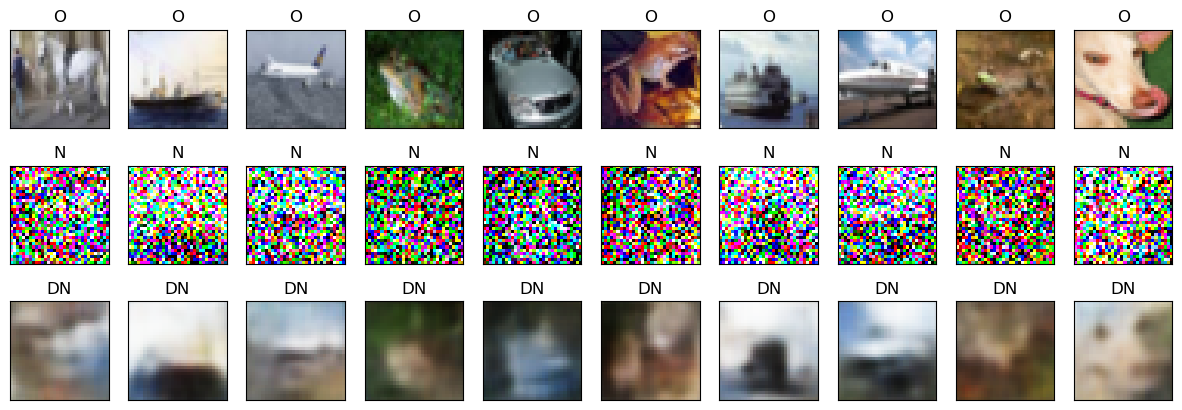

In [11]:
(x_data, _), (_, _) = tf.keras.datasets.cifar10.load_data()

x_data = x_data / 255.0

# Add random noise to the images
noise_factor = 1
x_noisy = x_data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_data.shape)

x_noisy = np.clip(x_noisy, 0.0, 1.0)

x_train, x_test, noised_train, noised_test = train_test_split(x_data, x_noisy, test_size=0.2, random_state=42)

# Model
autoencoder = keras.models.Sequential()
autoencoder.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
autoencoder.add(keras.layers.MaxPooling2D((2, 2), padding='same'))
autoencoder.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
autoencoder.add(keras.layers.MaxPooling2D((2, 2), padding='same'))
autoencoder.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
autoencoder.add(keras.layers.UpSampling2D((2, 2)))
autoencoder.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
autoencoder.add(keras.layers.UpSampling2D((2, 2)))
autoencoder.add(keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(noised_train, x_train, epochs=10, batch_size=128, shuffle=True)
x_denoised = autoencoder.predict(noised_test)

psnr_values = [cl.psnr(original, denoised) for original, denoised in zip(x_test, x_denoised)]

average_psnr = np.mean(psnr_values)
print(f"Average PSNR: {average_psnr} dB")

# Display original, noisy, and denoised images for comparison
# Number of samples to display
n = 10 
plt.figure(figsize=(15, 5))
for i in range(n):
    # Original Image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("O")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy Image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(noised_test[i])
    plt.title("N")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Denoised Image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_denoised[i])
    plt.title("DN")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()